<a href="https://colab.research.google.com/github/hvplus/Google_Colab/blob/master/GCN_Sractchipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install celluloid
!sudo add-apt-repository ppa:mc3man/trusty-media
!sudo apt-get update
!sudo apt-get install ffmpeg gstreamer0.10-ffmpeg
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import imageio
from celluloid import Camera
from IPython.display import HTML

plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

 Upgraded, advanced or not normally available multimedia packages for Trusty
Xenial users go here - https://launchpad.net/~mc3man/+archive/ubuntu/xerus-media

*Please note that if using this ppa I would *not* try upgrading to 14.10/15.04, ect. Do a fresh install instead. The intent here is just for users wishing to stay on 14.04*

If upgrading releases anyway use ppa-purge *First* -
sudo ppa-purge  ppa:mc3man/trusty-media

Also note that using this ppa then disabling may cause issue for installing i386 packages like used by wine. So once enabled leave enabled or purge before removing.

Additionally if using apt-get * sudo  apt-get dist-upgrade will be needed* at times.(pay attention).  Otherwise package managers may be ok.

So typically to enable & first use -
sudo add-apt-repository ppa:mc3man/trusty-media
sudo apt-get update
sudo apt-get dist-upgrade

A few notes:
gstreamer0.10-ffmpeg - needed for some apps that still use gstreamer-0.10 & also provides h.264 in html5 decoding for fir

In [ ]:
class GCNConv(nn.Module):
  def __init__(self, A, in_channels, out_channels):
    super(GCNConv,self).__init__()
    self.A_hat = A+torch.eye(A.size(0))
    self.D = torch.diag(torch.sum(A,1))
    self.D = self.D.inverse().sqrt()
    self.A_hat = torch.mm(torch.mm(self.D, self.A_hat),self.D)
    self.W = nn.Parameter(torch.rand(in_channels,out_channels, requires_grad=True))

  def forward(self, X):
    out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))
    return out

In [ ]:
class Net(torch.nn.Module):
  def __init__(self,A,nfeat,nhid,nout):
    super(Net, self).__init__()
    self.conv1 = GCNConv(A,nfeat,nhid)
    self.conv2 = GCNConv(A,nhid,nout)

  def forward(self,X):
    H = self.conv1(X)
    H2 = self.conv2(H)
    return H2

A=torch.Tensor([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
                [1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                [1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1],
                [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],
                [0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0]
                ])


target=torch.tensor([0,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,1])
X=torch.eye(A.size(0))
T=Net(A,X.size(0), 10, 2)
X.shape

torch.Size([34, 34])

In [ ]:
criterion = torch.nn.CrossEntropyLoss(ignore_index=-1)
optimizer = optim.SGD(T.parameters(), lr=0.01, momentum=0.9)

loss=criterion(T(X),target)

MovieWriter ffmpeg unavailable; trying to use pillow instead.


TypeError: ignored

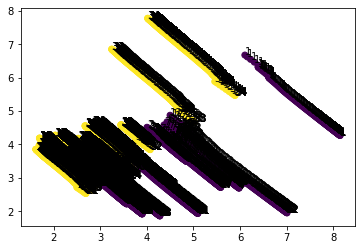

In [ ]:
fig = plt.figure()
camera = Camera(fig)

for i in range(200):
  optimizer.zero_grad()
  loss = criterion(T(X), target)
  loss.backward()
  optimizer.step()
  l = (T(X))

  plt.scatter(l.detach().numpy()[:,0],l.detach().numpy()[:,1],c=[0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0 ,1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])
  for i in range(l.shape[0]):
      text_plot = plt.text(l[i,0], l[i,1], str(i+1))

  camera.snap()

  if i%20==0:
      print("Cross Entropy Loss: =", loss.item())

animation = camera.animate(blit=False, interval=150)
animation.save('./train_karate_animation.mp4', writer='ffmpeg', fps=60)
HTML(animation.to_html5_video())



In [ ]:
!pip install torch-scatter
!pip install torch-sparse
!pip install torch-cluster
!pip install torch-spline-conv
!pip install torch-geometric

  Created wheel for torch-scatter: filename=torch_scatter-2.0.5-cp36-cp36m-linux_x86_64.whl size=12183797 sha256=a15325045213dbd66c03416879d9038e48ac1ed8b1d008306fb14711ae2e6f40
  Stored in directory: /root/.cache/pip/wheels/42/59/d3/9866e4fd8e1fe9260740acfe22322c428bc0dc064d3ebc456c
Successfully built torch-scatter


In [ ]:
from torch_geometric.datasets import Planetoid

RuntimeError: ignored